In [4]:
# 라이브러리 불러오기 
import pandas as pd 
import numpy as np
import plotly.express as px 
import scipy.stats as stats 

In [5]:
df1 = pd.read_csv('data/17_Data.csv')
print(df1.shape)
df1.head(2)

(55809, 23)


,Unnamed: 0,os타입,국가,로그인타입,1일차접속여부,3일차접속여부,5일차접속여부,7일차접속여부,9일차접속여부,11일차접속여부,...,획득아이템수,사용아이템수,루비교환에사용된현금,캐릭터개방에사용된현금,스테이지개방에사용된현금,루비충전에사용된현금,가챠뽑기에사용된현금,스테이지_내_구매현금,구매상품명,구매횟수
0,0,Android,JP,LINE,0,0,0,0,0,0,...,41,41,0,0,0,0,0,32,NaN,NaN
1,1,Android,TH,LINE,1,0,0,0,0,0,...,12,8,0,0,0,0,0,0,NaN,NaN


In [17]:
# 1.  '전체가입유저' 중 'N일차'에 접속한 유저의 비율 계산하고자 한다. 아래의 리스트를 이용하여, 각 일차별 잔존율을 계산하시오.
# (1일 /3일/5일/7일/9일/11일/14일의 잔존율)  
# connection_status = ['1일차접속여부', '3일차접속여부', '5일차접속여부', '7일차접속여부', '9일차접속여부', '11일차접속여부', '14일차접속여부']

connection_status = ['1일차접속여부', '3일차접속여부', '5일차접속여부', '7일차접속여부', '9일차접속여부', '11일차접속여부', '14일차접속여부']
new_df = df1[connection_status]
for col in new_df.columns:
    print(f"{col} {(new_df[col].sum() / len(new_df)).round(3)}")

1일차접속여부 0.431
3일차접속여부 0.298
5일차접속여부 0.257
7일차접속여부 0.24
9일차접속여부 0.218
11일차접속여부 0.206
14일차접속여부 0.199


In [19]:
# 2. 'os타입'별 각 일차별 잔존율을 계산하시오. 
l = df1['os타입'].value_counts().index

for t in l:
    new_df = df1.loc[df1['os타입'] == t][connection_status]
    print(t)
    for col in new_df.columns:
        print(f"{col} {(new_df[col].sum() / len(new_df)).round(3)}")

Android
1일차접속여부 0.434
3일차접속여부 0.29
5일차접속여부 0.242
7일차접속여부 0.224
9일차접속여부 0.202
11일차접속여부 0.191
14일차접속여부 0.185
iOS
1일차접속여부 0.427
3일차접속여부 0.309
5일차접속여부 0.276
7일차접속여부 0.262
9일차접속여부 0.239
11일차접속여부 0.226
14일차접속여부 0.217


In [21]:
# 3. 1일차에 접속한 이력이 있는 유저들의 연속형 데이터 기술통계량을 확인

day1_df = df1.loc[df1['1일차접속여부'] == 1]
day1_df.describe()

,Unnamed: 0,1일차접속여부,3일차접속여부,5일차접속여부,7일차접속여부,9일차접속여부,11일차접속여부,14일차접속여부,최종클리어스테이지,마지막도전스테이지,획득아이템수,사용아이템수,루비교환에사용된현금,캐릭터개방에사용된현금,스테이지개방에사용된현금,루비충전에사용된현금,가챠뽑기에사용된현금,스테이지_내_구매현금,구매횟수
count,24057.000000,24057.0,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,20752.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,203.000000
mean,27910.275304,1.0,0.583988,0.504843,0.469801,0.433304,0.406784,0.388993,22.375723,19.105458,27.104668,23.552189,0.028682,0.448934,0.004988,0.938604,2.410733,3.754375,1.192118
std,16099.996691,0.0,0.492906,0.499987,0.499098,0.495542,0.491244,0.487532,28.555554,26.906865,26.354477,26.511241,0.690817,4.258013,0.244613,5.865435,14.108534,48.601158,1.673183
min,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13936.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27752.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.000000,13.000000,19.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41882.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,27.000000,36.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,55807.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,851.000000,852.000000,321.000000,321.000000,40.000000,80.000000,12.000000,140.000000,840.000000,2098.000000,24.000000


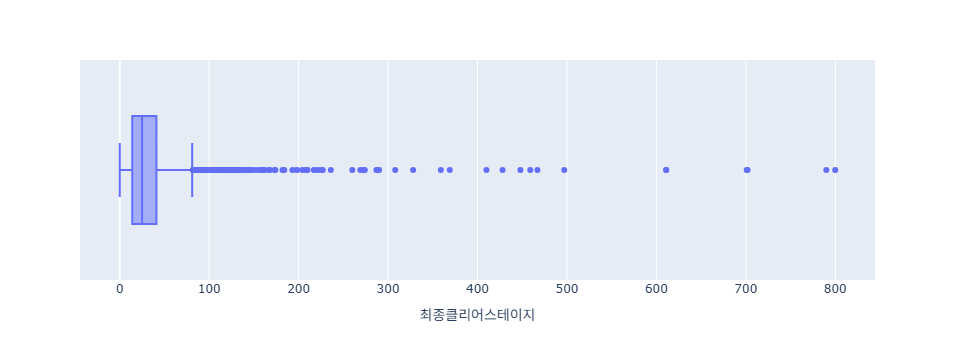

In [25]:
# 4. 1일차부터 14일차까지 모두 접속한 유저의 '최종클리어스테이지'분포를 시각화 (histogram or boxplot)

new_df = df1[~(df1[connection_status] == 0).any(axis =1)]
px.box(new_df, '최종클리어스테이지')

In [28]:
# 5. '최종클리어스테이지'에 빈도수를 확인하고, 유저들이 많이 남아 있는 스테이지 10개를 확인

df1['최종클리어스테이지'].value_counts().head(10)

최종클리어스테이지
10.0    4767
1.0     4141
11.0    2754
2.0     1805
4.0     1713
15.0    1645
3.0     1592
5.0     1385
0.0     1357
6.0     1210
Name: count, dtype: int64

In [30]:
# 6. '최종클리어스테이지'를 아래의 기준으로 '스테이지구분'이라는 파생변수를 생성
#     - 0 스테이지 : 0
#     - 1~5스테이지 : 1
#     - 6~10스테이지: 2
#     - 11~15스테이지: 3
#     - 16~ 스테이지 초과 :4
# - 구매지표에 대한 분석을 하고자 한다.

def func(row):
    if pd.isnull(row):
        return row
    if row > 16:
        return 4
    elif row >=11:
        return 3
    elif row >=6:
        return 2 
    elif row >=1:
        return 1
    else:
        return 0 

df1['스테이지구분'] = df1['최종클리어스테이지'].apply(func)
df1['스테이지구분'].value_counts()

스테이지구분
4.0    12807
1.0    10636
2.0     8685
3.0     7839
0.0     1357
Name: count, dtype: int64

In [34]:
# 7. 가입당일 과금을 하여 몰입한 고객을 분석하고자 한다. 
# 1일차에 접속한 유저들의 구매 비율(전체 대비, 아이템 구매를 한 유저의 비율)을 계산하시오. (구매이력이 있으면, 구매횟수에 데이터가 있음)

new_df = df1[df1['1일차접속여부'] == 1]
1 - (new_df['구매횟수'].isnull().sum() / len(new_df))

np.float64(0.008438292388909696)

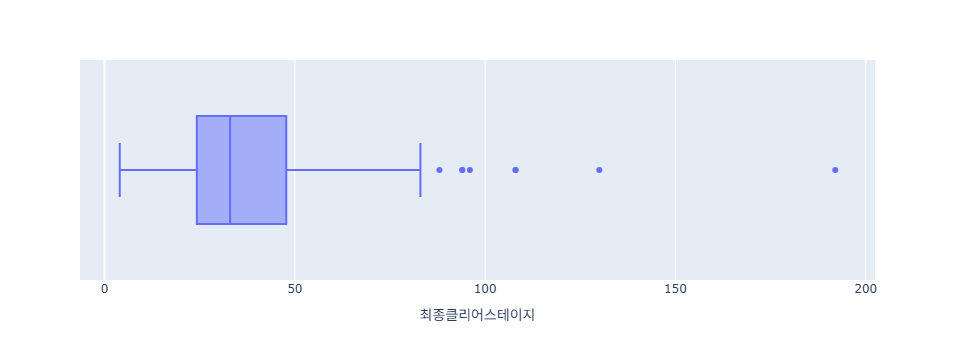

In [37]:
# 8. 1일차에 접속한 고객들이, 아이템을 구매했을때, (구매이력이 있을때, 즉 구매횟수가 존재할 때) 
# '최종클리어스테이지'가 어디까지 도달했는지, 분포를 Box Plot으로 시각화하시오.

buy_1_df = new_df[~new_df['구매횟수'].isnull()]
px.box(buy_1_df, '최종클리어스테이지')

In [38]:
# 9. '스테이지구분'별 유저들의 '구매횟수'의 합과 평균을 계산하시오.

df1.pivot_table(index = '스테이지구분', values='구매횟수', aggfunc=['sum', 'mean'])

,sum,mean
,구매횟수,구매횟수
스테이지구분,,
0.0,0.0,NaN
1.0,4.0,1.000000
2.0,12.0,1.000000
3.0,45.0,1.000000
4.0,231.0,1.203125


In [42]:
# 10. 1일 부터 14일 까지 모두 접속한 고객을 'VIP' / 나머지 고객을 'normal'로 'Target'이라는 변수명으로 선언하여, 
# 고객의 정보와 재화 사용 이력을 입력했을 때, 'VIP'와 'normal'을 분류하는 분류 모델을 생성하시오.
# - X : 'os타입', '국가','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금'
# - Y : Target
# - 학습 데이터와 검증 데이터는 7:3으로 분할
# - 배웠던 특성 공학 기법을 모두 적용하여 모델 구성 
# (impute / scaling / encoding / cross validation / hyperparameter tuning / oversampling / feature selection )

df1.loc[~(df1[connection_status] == 0).any(axis =1), 'Target'] = 1
df1.loc[(df1[connection_status] == 0).any(axis =1), 'Target'] = 0
df1['Target'].value_counts()

Target
0    50125
1     5684
Name: count, dtype: int64

In [43]:
# 국가 Column 항목값이 너무 많아 (One Hot Encoding 에서 연산소요), 4개로 줄여 처리 
top_list = df1['국가'].value_counts().head(3).index
cond1 = df1['국가'].isin(top_list)
df1['국가_clean'] = df1['국가']
df1.loc[~cond1, '국가_clean'] ='기타'
df1['국가_clean'].unique()

array(['JP', 'TH', 'TW', '기타'], dtype=object)

In [47]:
# 모델 구성에 필요한 라이브러리 호출 
from sklearn.model_selection import train_test_split # 학습 데이터와 검증 데이터를 분할 
from imblearn.pipeline import make_pipeline # 특성공학 + 학습 
from sklearn.compose import make_column_transformer # 파이프라인을 병렬로 분할 
from sklearn.impute import SimpleImputer # 문자->최빈값 / 숫자->중앙값 결측값 대치 
from sklearn.preprocessing import MinMaxScaler # 최대값 1 / 최솟값 0 (숫자 스케일링)
from sklearn.preprocessing import OneHotEncoder # 문자데이터 -> 1/0값의 숫자로 변환 
from imblearn.combine import SMOTETomek # OverSampling + UnderSampling 
from sklearn.feature_selection import f_classif # F 통계량을 이용한 변수선택법 
from sklearn.feature_selection import SelectKBest # 사용자가 지정한 수 만큼 변수를 선택 
from skopt import BayesSearchCV # 교차검증 + 하이퍼파라미터 튜닝 
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘 호출 
from sklearn.metrics import classification_report # 분류모델에 대한 평가 
import pickle # 학습한 모델을 파일형태로 저장 

X = df1[['os타입', '국가_clean','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금']]
Y = df1['Target'].astype(int)

X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state=1234)

# 파이프라인 구성 (문자 / 숫자) 
# pipe1 : 숫자 데이터 처리 파이프 (중앙값으로 결측값 대치 -> 스케일링) 
pipe1 = make_pipeline( SimpleImputer(strategy='median'), MinMaxScaler() )
# pipe2 : 문자 데이터 처리 파이프 (최빈값으로 결측값 대치 -> One Hot Encoding) 
pipe2 = make_pipeline( SimpleImputer(strategy='most_frequent'),
                       OneHotEncoder(handle_unknown='ignore'))

# 숫자는 숫자끼리 문자는 문자끼리 처리되는 병렬 파이프 구조를 구성 
num_list = X.describe().columns
catg_list = X.describe(include='object').columns
prepro_pipe = make_column_transformer((pipe1, num_list), (pipe2, catg_list))

# 특성 공학 + 학습 
model_pipe = make_pipeline( prepro_pipe, 
                           SMOTETomek(), SelectKBest(f_classif, k=5),
                           DecisionTreeClassifier() )

# 교차검증과 하이퍼파라미터 튜닝 
hyper = {'decisiontreeclassifier__max_depth':(5,10)}
bayes_model = BayesSearchCV(model_pipe, hyper, n_iter=3, 
                            cv=3, scoring='f1', n_jobs=-1 )
bayes_model.fit(X_train, Y_train)
best_model = bayes_model.best_estimator_

# 평가 함수 생성 
def eval_func(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print('학습능력')
    print(classification_report(Y_train, Y_train_pred))
    print('일반화 능력')
    print(classification_report(Y_test, Y_test_pred))

# 모델을 저장 
pickle.dump(best_model, open('game_model.sav','wb'))
eval_func(best_model) 

학습능력
              precision    recall  f1-score   support

           0       0.96      0.76      0.85     35088
           1       0.26      0.73      0.38      3978

    accuracy                           0.76     39066
   macro avg       0.61      0.74      0.61     39066
weighted avg       0.89      0.76      0.80     39066

일반화 능력
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     15037
           1       0.26      0.73      0.38      1706

    accuracy                           0.76     16743
   macro avg       0.61      0.75      0.62     16743
weighted avg       0.89      0.76      0.80     16743



In [48]:
df1 = pd.read_csv('data/08_Data.csv')
print(df1.shape)
df1.head(2)

(93043, 17)


,Unnamed: 0,Code_Num,Datetime,Process_Type,ST,Tube Furnace CP,Tube Furnace1 OP,Tube Furnace1 Temp,Tube Furnace2 OP,Tube Furnace2 Temp,Tube Furnace3 OP,Tube Furnace3 Temp,Tube Furnace4 OP,Tube Furnace4 Temp,Z1-OP1,Z1-OP2,Z1-Temp
0,0,GroupA,2022-01-03 11:22,OP-A,NaN,0.450497,73.527404,NaN,59.989422,868.759544,52.249481,NaN,72.134908,NaN,74.255730,76.879748,NaN
1,1,GroupA,2022-01-03 11:22,OP-A,NaN,0.457370,79.149174,878.116929,62.027232,883.821264,50.617109,890.74076,71.245235,894.430606,66.323571,71.297720,NaN


In [52]:
# 08_Data.csv 를 불러와 df1으로 선언하고, 아래의 미션을 수행하시오.
# 11. Z1-Temp값을 목표변수로 회귀 모델을 구성하고자 한다.
# 각 소입로(Tube Furnace) 온도계수(Temp)와 열전도율(OP), CP, ST값을 입력했을 때, Z1-Temp를 예측할 수 있는 모델을 **다중 선형 회귀 모델**로 구성하시오.
# - X : 'Tube Furnace CP', 'Tube Furnace1 OP', 'Tube Furnace1 Temp', 'Tube Furnace2 OP', 'Tube Furnace2 Temp', 'Tube Furnace3 OP', 'Tube Furnace3 Temp', 'Tube Furnace4 OP', 'Tube Furnace4 Temp', 'ST'
# - 먼저 다중 선형회귀 모델을 구성한 뒤, 성능을 확인하시오.
# - 다항회귀분석을 이용해, 3차원 다항 회귀 모델을 구성한 뒤, 성능을 확인하시오.
# - 규제선형회귀 모델 중 하나를 활용해 회귀모델을 구성한 뒤, 성능을 확인하시오.
# - 본인이 만든 모델 중 가장 성능이 좋은 모델을 Best.sav로 저장하시오.
# - 가장 성능이 좋은 모델의 회귀 계수를 확인하시오.
# - 현재 만든 모델을 "08_Data_Test.csv"파일을 넣어, Test Set Score (R2)를 계산하시 

cond1 = (df1['Z1-Temp'].isnull())
df1 = df1.loc[~cond1]

X = df1[['Tube Furnace CP', 'Tube Furnace1 OP', 'Tube Furnace1 Temp', 'Tube Furnace2 OP', 'Tube Furnace2 Temp', 'Tube Furnace3 OP', 'Tube Furnace3 Temp', 'Tube Furnace4 OP', 'Tube Furnace4 Temp', 'ST']]
Y = df1['Z1-Temp']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

# 다중선형회귀 모형 
from sklearn.linear_model import LinearRegression
# 다항선형회귀 모형 
from sklearn.preprocessing import PolynomialFeatures 
# 규제선형회귀 모형
from sklearn.linear_model import ElasticNet 
# ElasticNet : L1 + L2 모두 사용한 규제 선형 모형
# 회귀 계수가 작은 X는 회귀 계수를 0으로 변환 / 회귀 계수가 큰 값은 특정 값보다 작게 모델을 구성 

from sklearn.preprocessing import RobustScaler # 연속형 자료 스케일링 

# 파이프라인 구성 
# 다중회귀 모형 
pipe1 = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), LinearRegression())
# 다항회귀 모형 
pipe2 = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), 
                     PolynomialFeatures(degree=3), LinearRegression())
# 규제회귀 모형
pipe3 = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(), ElasticNet())

pipe1.fit(X_train, Y_train)
pipe2.fit(X_train, Y_train)
pipe3.fit(X_train, Y_train)

# 평가 수행 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 평가 함수를 구성하여, 모델 평가 
def reg_eval(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print('학습 R2 성능 :', r2_score(Y_train, Y_train_pred))
    print('검증 R2 성능 :', r2_score(Y_test,  Y_test_pred))
    print('학습 MSE 성능 :', mean_squared_error(Y_train, Y_train_pred))
    print('검증 MSE 성능 :', mean_squared_error(Y_test,  Y_test_pred))

reg_eval(pipe1)
reg_eval(pipe2)
reg_eval(pipe3)


학습 R2 성능 : 0.08005835520721072
검증 R2 성능 : 0.08297128976698664
학습 MSE 성능 : 0.18947859802982556
검증 MSE 성능 : 0.18831480825332023
학습 R2 성능 : 0.16851308024862943
검증 R2 성능 : 0.16013689467398495
학습 MSE 성능 : 0.17125974970957492
검증 MSE 성능 : 0.17246860198991928
학습 R2 성능 : 0.0
검증 R2 성능 : -3.0554790713788194e-05
학습 MSE 성능 : 0.20596806232476228
검증 MSE 성능 : 0.20535950518389243


In [54]:
# Test File 호출 및 평가 
df_test = pd.read_csv('data/08_Data_Test.csv')
print(df_test.shape)
df_test.head(2)

(9305, 12)


,Unnamed: 0,Tube Furnace CP,Tube Furnace1 OP,Tube Furnace1 Temp,Tube Furnace2 OP,Tube Furnace2 Temp,Tube Furnace3 OP,Tube Furnace3 Temp,Tube Furnace4 OP,Tube Furnace4 Temp,ST,Z1-Temp
0,0,0.460490,79.606245,897.896312,47.516886,881.901111,51.662753,908.541559,69.978787,890.282464,69.561374,100.355255
1,1,0.451225,70.541470,864.727682,45.865138,867.630193,50.332839,909.589558,67.667267,872.801512,68.894368,99.360495


In [55]:
Y_test2 = df_test['Z1-Temp']
X_test2 = df_test.drop(columns=['Unnamed: 0', 'Z1-Temp'])

Y_test_pred2 = pipe2.predict(X_test2) # 예측값 계산 

r2_score(Y_test2, Y_test_pred2)

0.1793739752440373

In [57]:
# 12. 위의 모델에서 변수 선택법(F통계량 이용)을 이용하여, 4개의 X만 선별해 Target을 예측하는 모델을 구성하고, 
# 변수선택법에 의해 선택된 4개의 X값이 무엇인지 확인하시오. 
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import GridSearchCV

# 결측값 처리(중앙값) -> 스케일링 -> 변수선택(4개) -> 학습 
pipe4 = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(),
                     SelectKBest(f_regression, k=4), ElasticNet())

hyper = {'elasticnet__alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5]}
grid_model = GridSearchCV(pipe4, param_grid=hyper, cv=5, scoring='r2', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

# 변수선택법에 의해 결정된 4가지 항목을 확인 
selet_num = best_model['selectkbest'].get_support(indices=True)
col_dict = dict(zip(range(len(X.columns)), X.columns))
list(map(col_dict.get,selet_num))


['Tube Furnace CP', 'Tube Furnace2 Temp', 'Tube Furnace4 OP', 'ST']

In [58]:
# 13. 위에서 선택된 4개의 X값들이 각각 어떤 상관관계가 있는지 확인하시오.
df4 = df1[['Tube Furnace CP', 'Tube Furnace2 Temp', 'Tube Furnace4 OP', 'ST']].dropna()

# 정규성 검정 
# 귀무가설 : 해당 연속형 자료의 분포는 정규분포를 따른다 / 대립가설 : 정규분포를 따르지 않는다 
print(stats.normaltest(df4['Tube Furnace CP']))
print(stats.normaltest(df4['Tube Furnace2 Temp']))
print(stats.normaltest(df4['Tube Furnace4 OP']))
print(stats.normaltest(df4['ST'])) 
# P.value (귀무가설이 참일 확률) < 0.05(5% / 유의수준) 
# 대립가설 참 (귀무가설기각) / 모든 연속형자료는 정규분포를 따르지 않음 

df4.corr(method='spearman')

NormaltestResult(statistic=np.float64(46066.17234762602), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(80958.70510917634), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(10917.847285826652), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(3441.4905138133176), pvalue=np.float64(0.0))


,Tube Furnace CP,Tube Furnace2 Temp,Tube Furnace4 OP,ST
Tube Furnace CP,1.000000,0.007345,-0.012026,-0.008257
Tube Furnace2 Temp,0.007345,1.000000,-0.008439,-0.005550
Tube Furnace4 OP,-0.012026,-0.008439,1.000000,-0.026571
ST,-0.008257,-0.005550,-0.026571,1.000000


In [60]:
# 14. 상관성이 가장 높은 2개의 인자를 선택해,Code_Num 별 두 변수의 평균/표준편차를 계산하시오.

df1.pivot_table(index='Code_Num', values=['Tube Furnace4 OP','ST'],aggfunc=['mean','std'])

mean                        std                 
                 ST Tube Furnace4 OP        ST Tube Furnace4 OP
Code_Num                                                       
GroupA    69.953048        70.749941  0.556214         2.524301
GroupB    69.961770        71.141944  0.637348         2.260449
GroupC    69.924030        67.630012  0.653494         2.148475
GroupD    69.925462        69.941883  0.620362         1.811230
GroupE    69.822602        70.270911  0.613138         2.714588
GroupF    69.912158        68.927763  0.590398         1.498486

In [62]:
# 15. 'Code_Num'를 입력했을 때, 해당 Code에 각 소입로(Tube Furnace) 온도계수(Temp)와 열전도율(OP)의 기술통계량을 계산해 출력하고,
# 각 소입로(Tube Furnace) 온도계수(Temp)와 열전도율(OP)를 입력했을 때, 'Z1-OP1', 'Z1-OP2'의 평균을 예측하는 함수를 구성하시오.

Y = (df1['Z1-OP1'] + df1['Z1-OP2'])/2
Y.isnull().sum()

np.int64(0)

In [67]:
X = df1[[x for x in df1.columns if 'Tube Furnace' in x] + ['Code_Num']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

pipe1 = make_pipeline(SimpleImputer(strategy='median'), RobustScaler())
pipe2 = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                      OneHotEncoder(handle_unknown='ignore'))
pipe3 = make_column_transformer((pipe1, [x for x in df1.columns if 'Tube Furnace' in x]), 
                                (pipe2, ['Code_Num']))

model_pipe = make_pipeline(pipe3, LinearRegression())
model_pipe.fit(X_train, Y_train)

def func():
    print(df1['Code_Num'].unique())
    input_code = input('Code Number를 입력하시오 : ')

    cond1 = df1['Code_Num'] ==input_code
    print(df1.loc[cond1][[x for x in df1.columns if 'Tube Furnace' in x]].describe())

    # 각 소입로 정보 값 입력 
    x1 = input('Tube Furnace CP 값을 입력하시오 :')
    input1 = input('Tube Furnace1 OP/Temp값을 각각 입력하시오 (/기호로 구분) :')
    input2 = input('Tube Furnace2 OP/Temp값을 각각 입력하시오 (/기호로 구분) :')
    input3 = input('Tube Furnace3 OP/Temp값을 각각 입력하시오 (/기호로 구분) :')
    input4 = input('Tube Furnace4 OP/Temp값을 각각 입력하시오 (/기호로 구분) :')

    # 두개의 값을 입력받은 변수를 분할 
    x2, x3 = tuple(input1.split('/'))
    x4, x5 = tuple(input2.split('/'))
    x6, x7 = tuple(input3.split('/'))
    x8, x9 = tuple(input4.split('/'))

    input_data = pd.DataFrame(data=[[x1,x2,x3,x4,x5,x6,x7,x8,x9,input_code]],
                    columns=[x for x in df1.columns if 'Tube Furnace' in x]+['Code_Num'])
    return model_pipe.predict(input_data)

func()

['GroupA' 'GroupB' 'GroupC' 'GroupD' 'GroupE' 'GroupF']


Code Number를 입력하시오 :  GroupA


       Tube Furnace CP  Tube Furnace1 OP  Tube Furnace1 Temp  \
count      7340.000000       7340.000000         7340.000000   
mean          0.455518         76.208335          884.306426   
std           0.006602         22.988363           14.826524   
min           0.431523          0.176437          848.284519   
25%           0.452157         72.110889          871.591564   
50%           0.455215         80.346967          884.459472   
75%           0.458179         88.979799          896.653346   
max           0.514523        100.999379          920.040188   

       Tube Furnace2 OP  Tube Furnace2 Temp  Tube Furnace3 OP  \
count       7340.000000         7340.000000       7340.000000   
mean          59.839226          885.125596         51.179730   
std            1.813115           14.328253          1.468222   
min           53.342449          859.120492         45.525277   
25%           58.725427          872.838211         50.284686   
50%           59.894428          

Tube Furnace CP 값을 입력하시오 : 0.45
Tube Furnace1 OP/Temp값을 각각 입력하시오 (/기호로 구분) : 75/884
Tube Furnace2 OP/Temp값을 각각 입력하시오 (/기호로 구분) : 45/885
Tube Furnace3 OP/Temp값을 각각 입력하시오 (/기호로 구분) : 50/884
Tube Furnace4 OP/Temp값을 각각 입력하시오 (/기호로 구분) : 68/885


array([72.68189886])